In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [362]:
# Loading the dataset
data = pd.read_excel('/content/drive/MyDrive/social_data.xlsx')
data.head(5)


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   int64         
 5   Total Engagements  3479 non-null   int64         
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 190.4+ KB


In [364]:
data.columns

Index(['Published Date', 'Account', 'Account Type', 'Campaign Name',
       'Total Impressions', 'Total Engagements', 'Media Type'],
      dtype='object')

In [365]:
# splitting the Published Date column to a date and time separate columns.
data['Datetime'] = pd.to_datetime(data['Published Date'])
data['Date'] = data['Datetime'].dt.date
data['Time'] = data['Datetime'].dt.time
data['Hour'] = data['Datetime'].dt.hour

In [366]:
# Finding the day according to the date using the datetime module for finding the trend in engagements according to the day in a week.
data['Day'] = data['Date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d').weekday())

In [367]:
data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Datetime,Date,Time,Hour,Day
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:55:43.192,2023-03-31,19:55:43.192000,19,4
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:35.243,2023-03-31,19:49:35.243000,19,4
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:33.535,2023-03-31,19:49:33.535000,19,4
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:31.583,2023-03-31,19:49:31.583000,19,4
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,2023-03-31 19:43:42.590,2023-03-31,19:43:42.590000,19,4


In [368]:
data.tail()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Datetime,Date,Time,Hour,Day
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link,2023-01-03 10:35:12.652,2023-01-03,10:35:12.652000,10,1
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link,2023-01-03 10:34:55.487,2023-01-03,10:34:55.487000,10,1
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link,2023-01-03 10:34:38.631,2023-01-03,10:34:38.631000,10,1
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text,2023-01-03 10:34:03.438,2023-01-03,10:34:03.438000,10,1
3478,2023-01-01 14:59:04.000,General,FBPAGE,N/A,0,0,Photo,2023-01-01 14:59:04.000,2023-01-01,14:59:04,14,6


### 2023-03-31 is Friday as per google calender. It is represented as 4. 
### 2023-01-01 is Sunday as per google calender. It is represented as 6. 
### Thus 0 is Monday and 6 is Sunday so that 4 is friday.

In [369]:
# Chaning th representation of the day to day names.
Day_name = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thru', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
# Mapping the values of the dictionary to the day column
data['Day'] = data['Day'].map(Day_name)

In [370]:
data.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Datetime,Date,Time,Hour,Day
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:55:43.192,2023-03-31,19:55:43.192000,19,Fri
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:35.243,2023-03-31,19:49:35.243000,19,Fri
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:33.535,2023-03-31,19:49:33.535000,19,Fri
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:31.583,2023-03-31,19:49:31.583000,19,Fri
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,2023-03-31 19:43:42.590,2023-03-31,19:43:42.590000,19,Fri


### Function to plot bar charts for Individual columns with there each value occurances

In [371]:
def plot(data, column_name): 
  """
  param: data -- the dataset
  param: column_name -- Column name for which the bar chart needs to be plotted.
  """
  col_data = data[column_name].value_counts().to_dict()
  fig, ax = plt.subplots()
  bars = ax.bar(col_data.keys(), col_data.values(), width = 0.5, color = list('rgbkymc'))

  # Adding values on top of bars
  for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center')

  # Adding Title and axis labels
  ax.set_title(f'Number of Occurrences by {column_name}')
  ax.set_xlabel(f'{column_name}')
  ax.set_ylabel('Number of Occurrences')
  # ax.tick_params(axis='x', labelsize=6)
  fig.autofmt_xdate()

  # Show the chart
  plt.show()


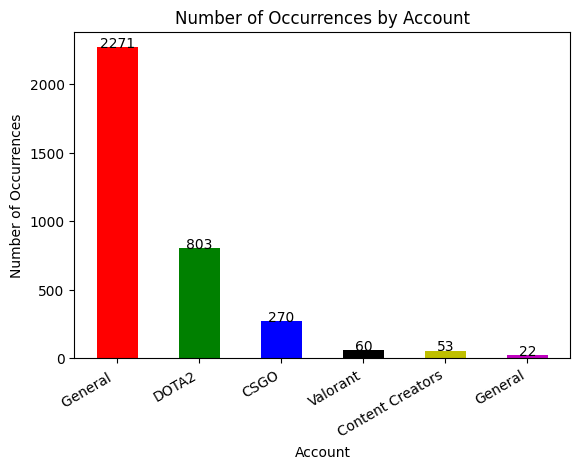

In [372]:
plot(data, 'Account')

### There are 2 sets of General. Let's check the unique values in the Account column and replace the both the Generals to same it is data entry mistake.

In [373]:
data['Account'].unique()

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

In [374]:
# Replacing 'General ' with 'General' to remove 2 categories for the same set.
data['Account'] = data['Account'].replace('General ', 'General')

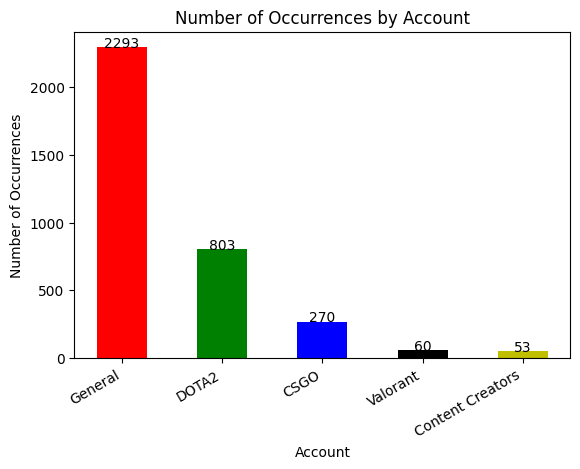

In [375]:
plot(data, 'Account')

## From the above graph, we can see the post related to the General is the most among our dataset. 2nd place by DOTA2 and then CSGO

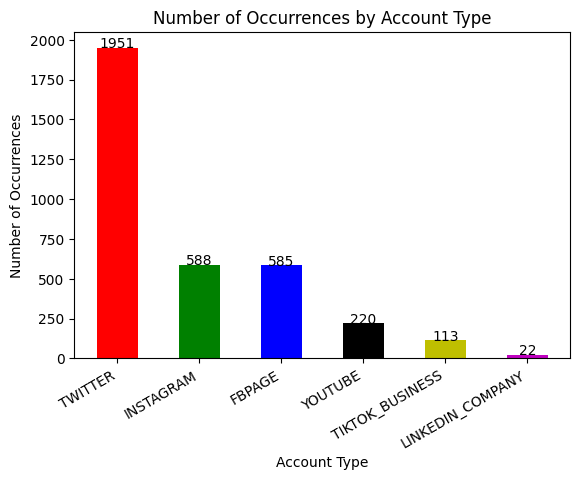

In [376]:
plot(data, 'Account Type')

### The Social Media used for promotions were TWITTER in the highest, which is three times more than instagram which is in second place. FBpages also stands similar to instagram. Then youtube and tictok.

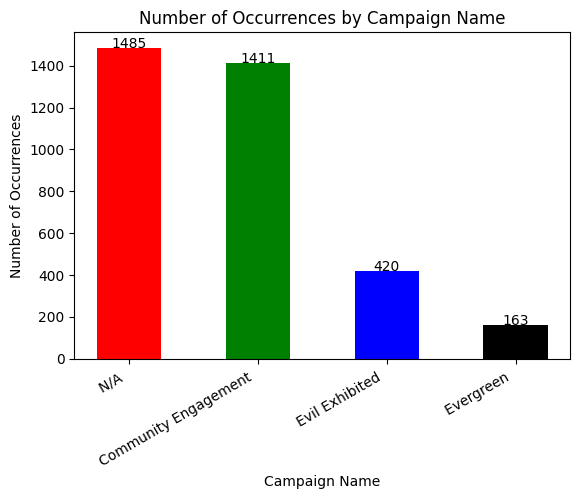

In [377]:
plot(data, 'Campaign Name')

### The most number of campaign are done without giving any campaign Name to them. Then community Engagement were given in the Second place. 

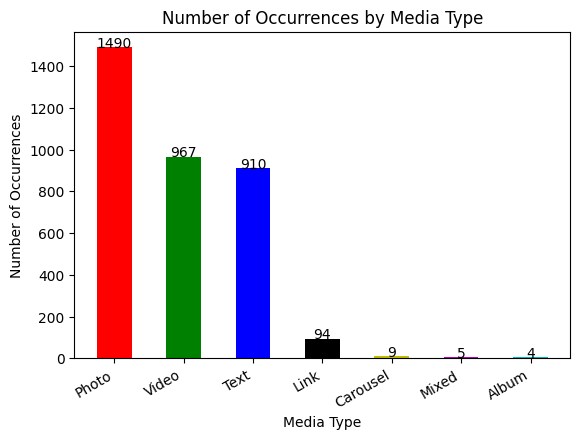

In [378]:
plot(data, 'Media Type')

## Grouping data columns based on Account and Account type, media type to check the Engagement rates


In [379]:
new_data = data.loc[:, ['Account', 'Account Type', 'Total Impressions', 'Total Engagements', 'Media Type']]

In [380]:
# Grouping by Categrory, subcategory and sub-subcategory
grouped_df = new_data.groupby(['Account', 'Account Type', 'Media Type']).sum()

# Printing the grouped DataFrame
print(grouped_df)


                                              Total Impressions  \
Account          Account Type     Media Type                      
CSGO             TWITTER          Link                     7898   
                                  Photo                 1541157   
                                  Text                    38643   
                                  Video                  726220   
Content Creators YOUTUBE          Link                        0   
                                  Text                        0   
                                  Video                   45186   
DOTA2            TWITTER          Link                     8827   
                                  Mixed                    8928   
                                  Photo                 1071172   
                                  Text                   394203   
                                  Video                  307681   
                 YOUTUBE          Video                   6851

In [381]:
# Converting back to a dataframe to visualize it.
new_df = grouped_df.reset_index()
# Finding the Engagement Rate
new_df['Engagement Rate'] = round(new_df['Total Engagements'] / new_df['Total Impressions']*100,1)
# There were some values where the Engagement Rate became NaN since there were no Engagements. These were replaced to zero.
new_df.fillna(value=0)

,Account,Account Type,Media Type,Total Impressions,Total Engagements,Engagement Rate
0,CSGO,TWITTER,Link,7898,97,1.2
1,CSGO,TWITTER,Photo,1541157,48038,3.1
2,CSGO,TWITTER,Text,38643,1341,3.5
3,CSGO,TWITTER,Video,726220,42860,5.9
4,Content Creators,YOUTUBE,Link,0,0,0.0
5,Content Creators,YOUTUBE,Text,0,0,0.0
6,Content Creators,YOUTUBE,Video,45186,1387,3.1
7,DOTA2,TWITTER,Link,8827,519,5.9
8,DOTA2,TWITTER,Mixed,8928,1413,15.8
9,DOTA2,TWITTER,Photo,1071172,68611,6.4


## Analysis on Media type

### For Content Creaters Youtube videos provides the maximum Engagement rates.
### 

In [382]:
# A function for ploting the grouped data.
def plotting_ER(data, Account):
  new_df = data[data['Account'] == Account]
  new_df['Combined'] = new_df['Account'] + '_' + new_df['Account Type'] + '_' + new_df['Media Type']
  df = new_df[['Combined', 'Engagement Rate']]
  fig, ax = plt.subplots()
  bars = ax.bar(df['Combined'], df['Engagement Rate'], width = 0.7, color = list('rgbkymc'))

  # Adding values on top of bars
  for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center')

  # Adding Title and axis labels
  ax.set_title('Engagement Rates')
  ax.set_xlabel('Combined')
  ax.set_ylabel('Engagements')
  if df.shape[0] > 5: ax.tick_params(axis='x', labelsize = 7)
  else: pass
  fig.autofmt_xdate()
  # Show the chart
  plt.show()


<ipython-input-382-9b875cd52294>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Combined'] = new_df['Account'] + '_' + new_df['Account Type'] + '_' + new_df['Media Type']


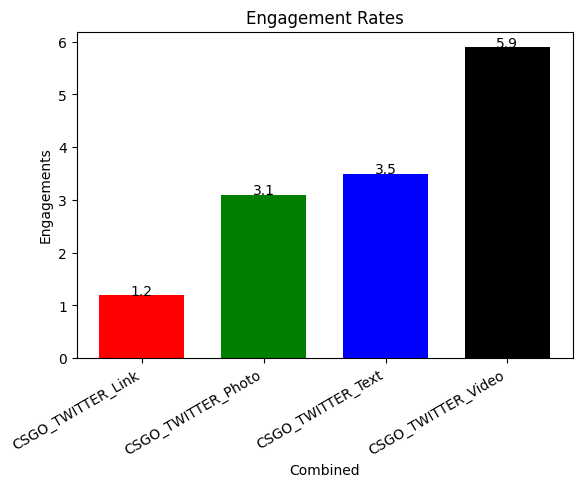

In [383]:
plotting_ER(new_df, 'CSGO')


<ipython-input-382-9b875cd52294>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Combined'] = new_df['Account'] + '_' + new_df['Account Type'] + '_' + new_df['Media Type']


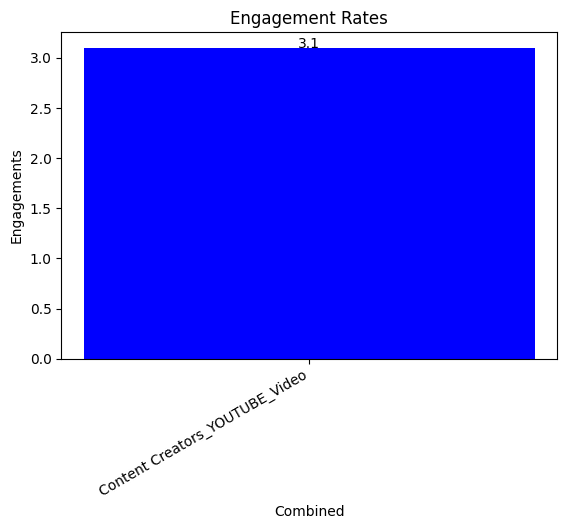

In [384]:
plotting_ER(new_df, 'Content Creators')

<ipython-input-382-9b875cd52294>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Combined'] = new_df['Account'] + '_' + new_df['Account Type'] + '_' + new_df['Media Type']


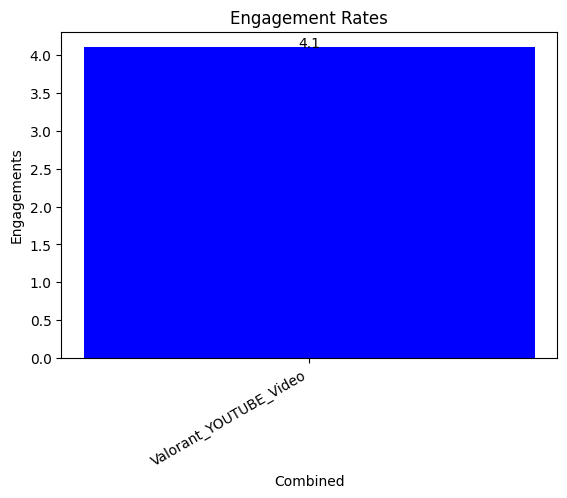

In [385]:
plotting_ER(new_df, 'Valorant')

<ipython-input-382-9b875cd52294>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Combined'] = new_df['Account'] + '_' + new_df['Account Type'] + '_' + new_df['Media Type']


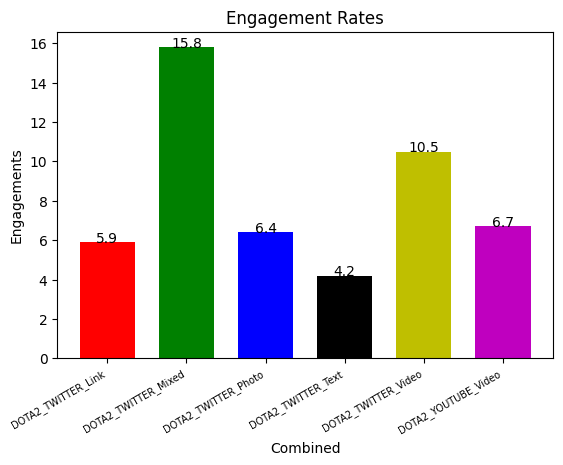

In [386]:
plotting_ER(new_df, 'DOTA2')

<ipython-input-382-9b875cd52294>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Combined'] = new_df['Account'] + '_' + new_df['Account Type'] + '_' + new_df['Media Type']


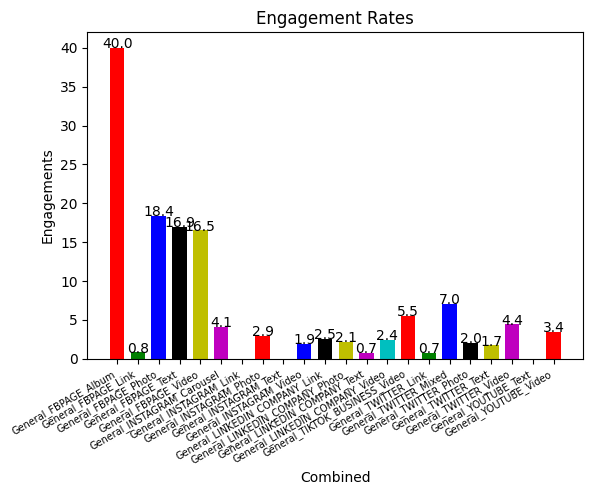

In [387]:
plotting_ER(new_df, 'General')

## Analysis on Day of the week vs Engagement Rate

In [388]:
day_data = data[['Account', 'Account Type', 'Total Impressions', 'Total Engagements', 'Day']]

In [389]:
# Grouping by Categrory, subcategory and sub-subcategory
grouped_df = day_data.groupby(['Account Type', 'Day']).sum()

# Printing the grouped DataFrame
print(grouped_df)

                       Total Impressions  Total Engagements
Account Type     Day                                       
FBPAGE           Fri             2883506             499901
                 Mon              607404             112333
                 Sat              649302              95371
                 Sun             1860946             349457
                 Thru            3501708             610057
                 Tue             3262069             604755
                 Wed             1708213             305410
INSTAGRAM        Fri              656834              15979
                 Mon              439260              10387
                 Sat              249905               3001
                 Sun              314871               7449
                 Thru             871108              18950
                 Tue              539048              14395
                 Wed              503033              13926
LINKEDIN_COMPANY Fri                7234

<ipython-input-389-1014f4e64fc9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = day_data.groupby(['Account Type', 'Day']).sum()


In [390]:
new_data = grouped_df.reset_index()

In [391]:
# Finding the Engagement Rate
new_data['Engagement Rate'] = round(new_data['Total Engagements'] / new_data['Total Impressions']*100,1)
# There were some values where the Engagement Rate became NaN since there were no Engagements. These were replaced to zero.
new_data.fillna(value=0)
new_data = new_data[['Account Type', 'Day', 'Engagement Rate']]

In [392]:
new_row1 = {'Account Type': 'LINKEDIN_COMPANY', 'Day': 'Sat', 'Engagement Rate': 0}
new_row2 = {'Account Type': 'LINKEDIN_COMPANY', 'Day': 'Sun', 'Engagement Rate': 0}
# append the new row to the dataframe
new_data = new_data.append(new_row1, ignore_index=True)
new_data = new_data.append(new_row2, ignore_index=True)
# sort dataframe by day
new_data = new_data.sort_values(by='Day').reset_index(drop=True)
new_data

<ipython-input-392-9da7cf552bd2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row1, ignore_index=True)
<ipython-input-392-9da7cf552bd2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row2, ignore_index=True)


,Account Type,Day,Engagement Rate
0,FBPAGE,Fri,17.3
1,YOUTUBE,Fri,5.3
2,TWITTER,Fri,3.1
3,TIKTOK_BUSINESS,Fri,4.6
4,INSTAGRAM,Fri,2.4
5,LINKEDIN_COMPANY,Fri,2.9
6,YOUTUBE,Mon,3.0
7,TWITTER,Mon,3.0
8,LINKEDIN_COMPANY,Mon,2.1
9,TIKTOK_BUSINESS,Mon,5.3


In [393]:
def daily_plot(data, Account_Type):
  data = data[data['Account Type'] == Account_Type][['Day', 'Engagement Rate']]
  plt.bar(data['Day'].values, data['Engagement Rate'].values,color = list('rgbkymc'))
  plt.xlabel(Account_Type)
  plt.ylabel('Engagement Rate')
  plt.title(f'Engagement Rate by Day of Week for {Account_Type}')
  plt.show()

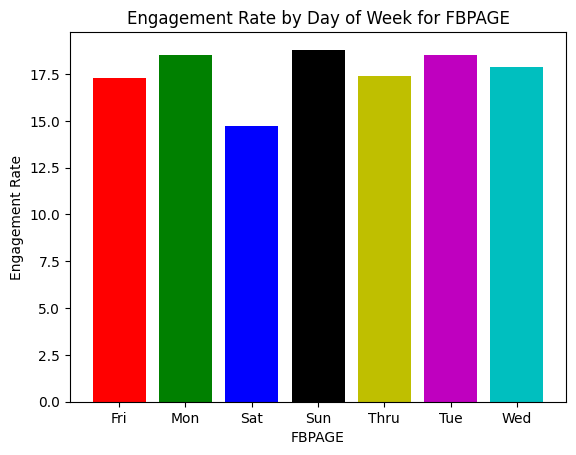

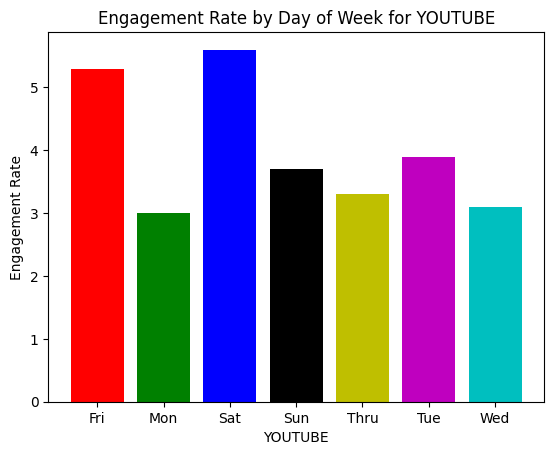

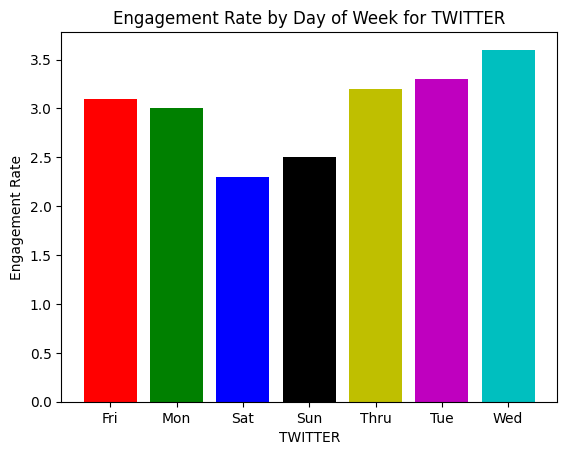

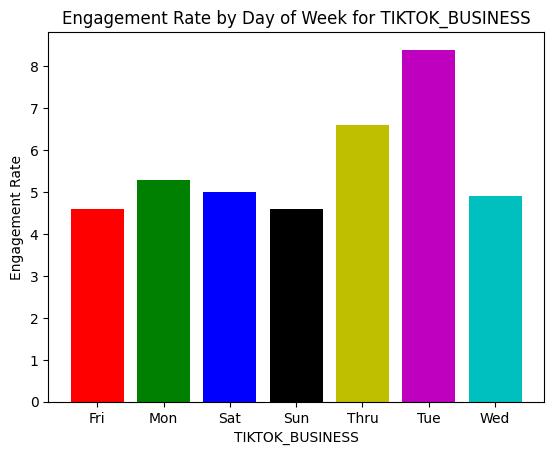

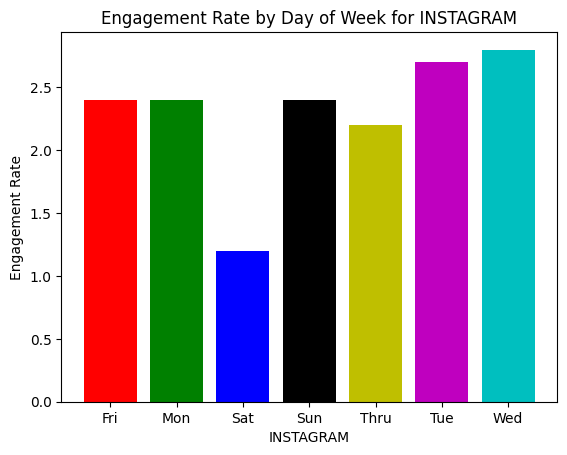

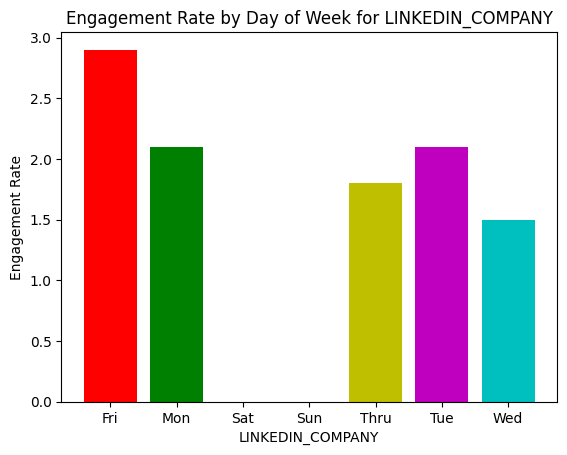

In [394]:
for i in new_data['Account Type'].unique():
  daily_plot(new_data, i)

## Analysis on Peak timings on each day

In [395]:
hour_data = data[['Day','Hour', 'Total Impressions', 'Total Engagements']]

hour_data = hour_data.groupby(['Day', 'Hour']).sum()

# Printing the grouped DataFrame
print(hour_data)

          Total Impressions  Total Engagements
Day Hour                                      
Fri 0                     0                  0
    3                 28515               2259
    4                 23807               3615
    5                122267              11839
    6                162743              16874
...                     ...                ...
Wed 18                 6305                207
    19                 8525                187
    20                12338                355
    21                 1282                 23
    23                 1935                121

[130 rows x 2 columns]


In [396]:
hour_data = hour_data.reset_index()
hour_data['Engagement Rate'] = round(hour_data['Total Engagements'] / hour_data['Total Impressions']*100,1)
hour_data = hour_data[['Day', 'Hour', 'Engagement Rate']]

In [397]:
hour_data.fillna(0)

,Day,Hour,Engagement Rate
0,Fri,0,0.0
1,Fri,3,7.9
2,Fri,4,15.2
3,Fri,5,9.7
4,Fri,6,10.4
...,...,...,...
125,Wed,18,3.3
126,Wed,19,2.2
127,Wed,20,2.9
128,Wed,21,1.8


In [398]:
def peak_hours(data, day):
  data = data[data['Day'] == day]
  top_3_peak_hours = data.sort_values('Engagement Rate', ascending=False).head(3)
  print(f"Peak Hours of {day}")
  print(top_3_peak_hours[['Hour', 'Engagement Rate']].reset_index(drop=True))
  print('\n')

In [399]:
for i in hour_data['Day'].unique():
  peak_hours(hour_data, i)

Peak Hours of Fri
   Hour  Engagement Rate
0    18             16.9
1     4             15.2
2    10             11.4


Peak Hours of Mon
   Hour  Engagement Rate
0    10             12.0
1    13             11.9
2     9             10.8


Peak Hours of Sat
   Hour  Engagement Rate
0     9             12.7
1     3             10.0
2     8              9.8


Peak Hours of Sun
   Hour  Engagement Rate
0    20             29.9
1     8             21.4
2    17             19.2


Peak Hours of Thru
   Hour  Engagement Rate
0    21             21.6
1     7             20.9
2     8             16.1


Peak Hours of Tue
   Hour  Engagement Rate
0     5             51.8
1    16             16.3
2    17             15.1


Peak Hours of Wed
   Hour  Engagement Rate
0     7             21.5
1     5             15.2
2    14             13.4




In [400]:
campagin_data = data[['Campaign Name', 'Total Impressions',	'Total Engagements']]

In [401]:
campagin_data

,Campaign Name,Total Impressions,Total Engagements
0,N/A,0,0
1,N/A,0,0
2,N/A,0,0
3,N/A,0,0
4,Community Engagement,9517,1215
...,...,...,...
3474,N/A,0,0
3475,N/A,0,0
3476,N/A,0,0
3477,N/A,2116,42


In [402]:
campagin_data = campagin_data.groupby(['Campaign Name']).sum()

# Printing the grouped DataFrame
print(campagin_data)

                       Total Impressions  Total Engagements
Campaign Name                                              
Community Engagement            23803756            2044767
Evergreen                        1328729              43127
Evil Exhibited                   5742595             185305
N/A                              7298086            1022773


In [403]:
campagin_data['Engagement Rate'] = round(campagin_data['Total Engagements'] / campagin_data['Total Impressions']*100,1)

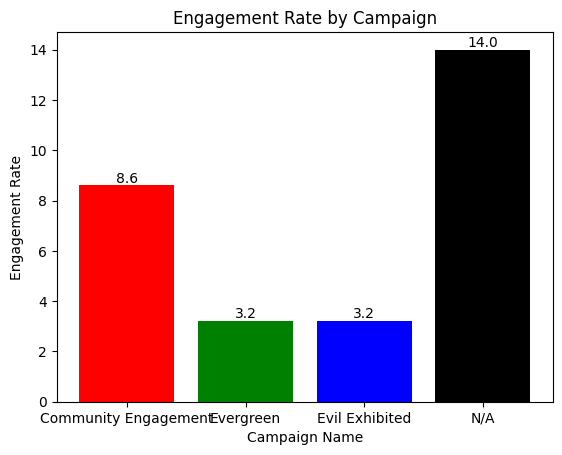

In [408]:
df = pd.DataFrame({
    'Campaign Name': ['Community Engagement', 'Evergreen', 'Evil Exhibited', 'N/A'],
    'Engagement Rate': [8.6, 3.2, 3.2, 14.0]})

# create the bar plot
plt.bar(df['Campaign Name'], df['Engagement Rate'], color = list('rgbkymc'))
for i, v in enumerate(df['Engagement Rate']):
    plt.text(i, v, str(v), ha='center', va='bottom')
# setting the title and axis labels
plt.title('Engagement Rate by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Engagement Rate')
plt.show()